# Neural Network

## Iris dataset

The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. Two of the three species were collected in the Gaspé Peninsula "all from the same pasture, and picked on the same day and measured at the same time by the same person with the same apparatus".

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other.

![iris](800px-Iris_sanguinea.jpg)

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

c:\users\sds\miniconda3\envs\test_env\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\sds\miniconda3\envs\test_env\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\sds\miniconda3\envs\test_env\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\sds\miniconda3\envs\test_env\lib\site-packages\tensorflow\

In [2]:
CSV_COLUMN_NAMES = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
SPECIES = ['Setosa', 'Versicolor', 'Virginica']

train_path = tf.keras.utils.get_file(
    "iris_training.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv")
test_path = tf.keras.utils.get_file(
    "iris_test.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv")

train = pd.read_csv(train_path, names=CSV_COLUMN_NAMES, header=0)
test = pd.read_csv(test_path, names=CSV_COLUMN_NAMES, header=0)

Let's see the training dataset.

In [3]:
train

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0
...,...,...,...,...,...
115,5.5,2.6,4.4,1.2,1
116,5.7,3.0,4.2,1.2,1
117,4.4,2.9,1.4,0.2,0
118,4.8,3.0,1.4,0.1,0


Let's extract features and labels from the dataset:

In [4]:
features = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
label = 'Species'
train_x = train[features].values
train_y = train[label].values
test_x = test[features].values
test_y = test[label].values

We would like to construct a linear model that classifies label(species) using features(sepal_length, sepal_width, petal_length, petal_width).

In [27]:
x = tf.placeholder(tf.float32)

W = tf.Variable(tf.truncated_normal([4, 3]))
b = tf.Variable(tf.truncated_normal([3]))

logits = tf.matmul(x, W) + b

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    print( sess.run(logits, {x:train_x})[:5] )

[[ 3.352169   5.9073877 -7.74756  ]
 [ 2.7124155  4.724131  -3.3937638]
 [ 2.52631    4.28105   -5.6028543]
 [ 2.794335   4.60717    1.6587235]
 [ 3.302449   5.406629   2.0552087]]


### softmax
This function performs the equivalent of

softmax = tf.exp(logits) / tf.reduce_sum(tf.exp(logits), axis)

We apply softmax to logits

In [28]:
x = tf.placeholder(tf.float32)

W = tf.Variable(tf.truncated_normal([4, 3]))
b = tf.Variable(tf.truncated_normal([3]))

logits = tf.matmul(x, W) + b
prob = tf.nn.softmax(logits)

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    print( (sess.run(prob, {x:train_x})*100).astype(np.int32) )


[[  0   0  99]
 [  0   0  99]
 [  0   0  99]
 [  0   0  99]
 [  0   0  99]
 [  0   0  99]
 [  0   0  99]
 [  0   0  99]
 [  0   0  99]
 [  0   0  99]
 [  0   0  99]
 [  0   0  99]
 [  0   0  99]
 [  0   0  99]
 [  0   0 100]
 [  0   0  99]
 [  0   0  99]
 [  0   0 100]
 [  0   0  99]
 [  0   0  99]
 [  0   0  99]
 [  0   0  99]
 [  0   0  99]
 [  0   0  99]
 [  0   0  99]
 [  0   0  99]
 [  0   0  99]
 [  0   0  99]
 [  0   0  99]
 [  0   0  99]
 [  0   0  99]
 [  0   0  99]
 [  0   0  99]
 [  0   0  99]
 [  0   0  99]
 [  0   0  99]
 [  0   0  99]
 [  0   0  99]
 [  0   0  99]
 [  0   0  99]
 [  0   0 100]
 [  0   0  99]
 [  0   0  99]
 [  0   0  99]
 [  0   0  99]
 [  0   0  99]
 [  0   0  99]
 [  0   0 100]
 [  0   0  99]
 [  0   0  99]
 [  0   0  99]
 [  0   0  99]
 [  0   0  99]
 [  0   0  99]
 [  0   0  99]
 [  0   0  99]
 [  0   0  99]
 [  0   0  99]
 [  0   0  99]
 [  0   0  99]
 [  0   0  99]
 [  0   0  99]
 [  0   0  99]
 [  0   0  99]
 [  0   0  99]
 [  0   0 100]
 [  0   0 

### One hot encoding, cross entropy

In [29]:
train_y_encoded = pd.get_dummies(train_y).values
print(train_y[:5])
train_y_encoded[:5]

[2 1 2 0 0]


array([[0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0]], dtype=uint8)

### Training


In [30]:
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

W = tf.Variable(tf.truncated_normal([4, 3]))
b = tf.Variable(tf.truncated_normal([3]))

logits = tf.matmul(x, W) + b
loss = tf.reduce_sum(tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=y))

optimizer = tf.train.GradientDescentOptimizer(.005)
train_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for step in range(1000):
        l, W_np, b_np, _ = sess.run((loss, W, b, train_op), {x:train_x, y:train_y_encoded})
        if step % 100 == 0:
            print(step, l)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.

0 530.09937
100 10.189713
200 9.814674
300 8.841625
400 8.723039
500 8.624154
600 8.466415
700 8.271529
800 8.063454
900 7.857594


### Train accuracy


In [31]:
def accuracy(features, labels, W, b):
    n = features.shape[0]
    y = np.argmax(np.matmul(features,W)+b, axis=1)
    
    return sum(y == labels)/n

train_logit = np.matmul(train_x,W_np)+b_np
train_copy = train.copy()
train_copy['prediction'] = np.argmax(train_logit,axis=1)
print(accuracy(train_x,train_y,W_np,b_np))
train_copy[:10]

0.9833333333333333


,SepalLength,SepalWidth,PetalLength,PetalWidth,Species,prediction
0,6.4,2.8,5.6,2.2,2,2
1,5.0,2.3,3.3,1.0,1,1
2,4.9,2.5,4.5,1.7,2,2
3,4.9,3.1,1.5,0.1,0,0
4,5.7,3.8,1.7,0.3,0,0
5,4.4,3.2,1.3,0.2,0,0
6,5.4,3.4,1.5,0.4,0,0
7,6.9,3.1,5.1,2.3,2,2
8,6.7,3.1,4.4,1.4,1,1
9,5.1,3.7,1.5,0.4,0,0


### Test accuracy

In [32]:
print(accuracy(test_x,test_y,W_np,b_np))

0.9666666666666667


## Mnist dataset

The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.
It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting.

In [33]:
(train_x, train_y),_ = tf.keras.datasets.mnist.load_data()
print(train_x.shape, train_y.shape)
print(train_x)
print(train_y)

(60000, 28, 28) (60000,)
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
[5 0 4 ... 5 6 8]


idx: 31941, label : 4


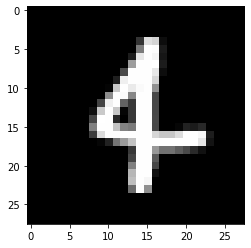

In [46]:
idx = np.random.randint(train_x.shape[0])

print('idx: {}, label : {}'.format(idx, train_y[idx]))
plt.imshow(train_x[idx], cmap='gray')
plt.show()

### Reshape
If we flatten the two dimensional 28 by 28 array to an one dimensional 784(28 times 28) array. Then the problem is similar to the previous one.

In [35]:
idx = np.random.randint(train_x.shape[0])

train_x_reshaped = train_x.reshape((60000,28*28))
print(train_x_reshaped.shape)
train_x_reshaped[idx]

(60000, 784)


array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0, 100, 195, 254, 237,
       153,  19,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,  55, 189, 249, 253,
       254, 253, 253, 236,  17,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  17, 20

Similar to the previous example, we encode labels:

In [36]:
train_y_encoded = pd.get_dummies(train_y).values
train_y_encoded

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]], dtype=uint8)

## Batch Training

Not enough memory for the whole dataset!!

In [37]:
def next_batch(num, features, labels):
    idx = np.arange(0 , features.shape[0])
    np.random.shuffle(idx)
    idx = idx[:num]
    data_shuffle = [features[i] for i in idx]
    labels_shuffle = [labels[i] for i in idx]

    return np.asarray(data_shuffle), np.asarray(labels_shuffle)

We use this function to generate random samples:

In [38]:
batch_x, batch_y = next_batch(64,train_x_reshaped,train_y_encoded)
print(batch_x.shape)
batch_x, batch_y

(64, 784)


(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0,

Use this sample to update weights stochastically.

In [39]:
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

num_features = 28*28
num_labels = 10

W = tf.Variable(tf.truncated_normal([num_features, num_labels]))
b = tf.Variable(tf.truncated_normal([num_labels]))

logits = tf.matmul(x, W) + b
loss = tf.reduce_sum(tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=y))

optimizer = tf.train.GradientDescentOptimizer(.005)
train_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for step in range(1000):
        batch_x, batch_y = next_batch(64,train_x_reshaped,train_y_encoded)
        l, W_np, b_np, _ = sess.run((loss, W, b, train_op), {x:batch_x, y:batch_y})
        if step % 100 == 0:
            print(step, l)

0 135262.17
100 192247.67
200 501113.12
300 334951.56
400 260822.25
500 535673.0
600 324359.8
700 383789.78
800 819399.9
900 277736.06


### Sample prediction

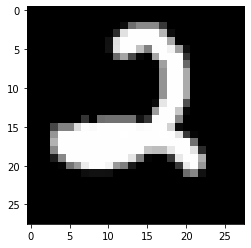

[  80975.55  -105468.625  306061.25   108940.93   -10756.735 -102989.484
   54909.934 -183701.58   -39801.895 -103335.36 ]
label: 2, prediction: 2, CORRECT


In [40]:
idx = np.random.randint(train_x.shape[0])

plt.imshow(train_x[idx], cmap='gray')
plt.show()

label_np = train_y[idx]
logits_np = np.matmul(train_x_reshaped[idx],W_np)+b_np
prediction = np.argmax(logits_np)
print( logits_np )
print( 'label: {}, prediction: {}, {}'.format(label_np,prediction, 'CORRECT' if label_np==prediction else 'INCORRECT') )


### Epoch

In [41]:
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

num_features = 28*28
num_labels = 10
batch_size = 64

W = tf.Variable(tf.truncated_normal([num_features, num_labels]))
b = tf.Variable(tf.truncated_normal([num_labels]))

logits = tf.matmul(x, W) + b
loss = tf.reduce_sum(tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=y))

optimizer = tf.train.GradientDescentOptimizer(.005)
train_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(20):
        num_batch = int(train_x.shape[0]//batch_size)
        for _ in range(num_batch):
            batch_x, batch_y = next_batch(64,train_x_reshaped,train_y_encoded)
            l, W_np, b_np, _ = sess.run((loss, W, b, train_op), {x:batch_x, y:batch_y})
        
        if epoch % 5 == 0:
            print('epoch: {}, loss: {}'.format(epoch, l))
    
    print('epoch: {}, loss: {}'.format(epoch, l))


epoch: 0, loss: 58855.40234375
epoch: 5, loss: 226311.5625
epoch: 10, loss: 373320.875
epoch: 15, loss: 329380.40625
epoch: 19, loss: 576050.375
